In [52]:
import requests 
import json 
import pandas 
from datetime import date
from datetime import timedelta
pandas.options.display.float_format = '{:.2f}'.format

today = date.today()
hier = today - timedelta(days=1)
hier = hier.strftime("%#m/%#d/%y")
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

#try:
   # r = requests.get(url)
   # r.raise_for_status()
#except requests.exceptions.RequestException as erreur:
#    print("Erreur de connexion à l'adresse web suivante `{0}` : {1}".format(url, erreur))
#else: 
rawdatac = pandas.read_csv(url).fillna('N.D')
datac = rawdatac.groupby(['Country/Region', 'Province/State'])[[hier]].sum()
datac_sorted = datac.sort_values(by=hier, ascending = False)
datac_sorted_top = datac_sorted.head(20)
datac_final = datac_sorted_top.rename(columns= {hier: 'Confirmed'})
datac_final.reset_index()

In [6]:
url2 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

rawdatar = pandas.read_csv(url2).fillna('N.D')
datar_group = rawdatar.groupby(['Country/Region', 'Province/State'])[[hier]].sum()
datar_group_sorted = datar_group.sort_values(by=hier, ascending = False)
datar_group_top = datar_group_sorted.head(20)

datar_final = datar_group_top.rename(columns= {hier: 'Recovered'})
datar_final

,,Recovered
Country/Region,Province/State,
China,Hubei,63612
Spain,N.D,30513
Germany,N.D,24575
Italy,N.D,19758
Iran,N.D,17935
France,N.D,14008
US,N.D,9707
"Korea, South",N.D,6021
Switzerland,N.D,4846


In [7]:
url3 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'

rawdatad = pandas.read_csv(url3).fillna('N.D')
datad_group = rawdatad.groupby(['Country/Region', 'Province/State'])[[hier]].sum()
datad_group_sorted = datad_group.sort_values(by=hier, ascending = False)
datad_group_top = datad_group_sorted.head(20)

datad_final = datad_group_top.rename(columns= {hier: 'Deaths'})
datad_final

,,Deaths
Country/Region,Province/State,
Italy,N.D,14681
Spain,N.D,11198
US,N.D,7087
France,N.D,6507
United Kingdom,N.D,3605
Iran,N.D,3294
China,Hubei,3203
Netherlands,N.D,1487
Germany,N.D,1275


In [41]:
rawdatac_group = rawdatac.groupby(['Country/Region'])[[hier]].sum()
df_confirmed = rawdatac_group.rename(columns={hier:'Confirmed'})
df_confirmed1 = df_confirmed.reset_index()

rawdatad_group = rawdatad.groupby(['Country/Region'])[[hier]].sum()
df_deaths = rawdatad_group.rename(columns={hier:'Deaths'})
df_deaths1 = df_deaths.reset_index()

rawdatar_group = rawdatar.groupby(['Country/Region'])[[hier]].sum()
df_recovered = rawdatar_group.rename(columns={hier:'Recovered'})
df_recovered1 = df_recovered.reset_index()

df_confirmed_deaths = df_confirmed1.join(df_deaths1.set_index('Country/Region'), on='Country/Region')
df_confirmed_deaths_recovered = df_confirmed_deaths.join(df_recovered1.set_index('Country/Region'), on='Country/Region')
df_final = df_confirmed_deaths_recovered.nlargest(10,columns='Confirmed')
df_final

,Country/Region,Confirmed,Deaths,Recovered
169,US,275586,7087,9707
84,Italy,119827,14681,19758
154,Spain,119199,11198,30513
65,Germany,91159,1275,24575
36,China,82511,3326,76760
61,France,65202,6520,14135
80,Iran,53183,3294,17935
173,United Kingdom,38689,3611,208
168,Turkey,20921,425,484
159,Switzerland,19606,591,4846


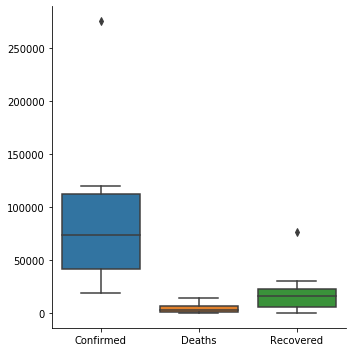

In [51]:
import seaborn

seaborn.catplot(kind='box', data=df_final, orient="v")

In [47]:
df_sum = df_confirmed_deaths_recovered.drop(columns='Country/Region')
df_sum_final = df_sum.sum()
print("En date du {0}:\n\n{1}".format(hier,df_sum_final))

En date du 4/3/20:

Confirmed    1095917
Deaths         58787
Recovered     225796
dtype: int64
